In [86]:
#columns = firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("us2022q2a.csv")
df_additional = pd.read_csv("usfirms2022.csv", usecols=["Ticker", "Sector NAICS\nlevel 1", "Name"])
df = df.join(df_additional.set_index("Ticker"), on="firm")
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000.0,1.0,"Agilent Technologies, Inc",Manufacturing
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,...,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000.0,2.0,"Agilent Technologies, Inc",Manufacturing
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,...,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000.0,3.0,"Agilent Technologies, Inc",Manufacturing
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,...,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000.0,4.0,"Agilent Technologies, Inc",Manufacturing
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,...,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001.0,1.0,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,...,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021.0,3.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,...,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021.0,4.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,...,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022.0,1.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324445,ZYNE,2022q2,0.0,0.0,9.168770e+03,0.0,-775.927860,-91.691,0.0,67006.959,...,237.414,57241.873,1.140000,1.1400,43595.959,6.0,2022.0,2.0,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [87]:
df.isna().sum()

firm                          1
q                             1
revenue                  165833
cogs                     166138
sgae                     166138
otheropexp               166136
extraincome              165834
finexp                   165833
incometax                165833
totalassets              164639
totalliabilities         164639
shortdebt                194770
longdebt                 164852
stockholderequity        164707
adjprice                 165293
originalprice            165213
sharesoutstanding        166625
fiscalmonth              164633
year                          1
cto                           1
Name                        631
Sector NAICS\nlevel 1       631
dtype: int64

In [88]:
df.dropna(inplace=True)
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,...,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000.0,2.0,"Agilent Technologies, Inc",Manufacturing
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,...,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000.0,3.0,"Agilent Technologies, Inc",Manufacturing
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,...,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000.0,4.0,"Agilent Technologies, Inc",Manufacturing
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,...,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001.0,1.0,"Agilent Technologies, Inc",Manufacturing
5,A,2001q2,2382000.0,1406000.0,1.038000e+06,0.0,273000.000000,0.000,115000.0,9080000.000,...,0.000,5616000.000,19.925522,32.5000,457072.749,6.0,2001.0,2.0,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324441,ZYNE,2021q2,0.0,0.0,9.838494e+03,0.0,-117.528220,-5.943,0.0,98195.904,...,468.385,87699.257,5.290000,5.2900,41251.537,6.0,2021.0,2.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,...,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021.0,3.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,...,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021.0,4.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,...,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022.0,1.0,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [89]:
df['qdate'] = pd.PeriodIndex(df['q'], freq="Q")
df.set_index(['firm'], inplace=True)

In [90]:
df['lprice'] = df.groupby(['firm'])['adjprice'].shift(4)
df['lrevenue'] = df.groupby(['firm'])['revenue'].shift(4)
df['ebit'] = df["revenue"] - df["cogs"] - df["sgae"] - df["otheropexp"]
df['lebit'] = df.groupby(['firm'])['ebit'].shift(4)
df[['q', 'adjprice', 'lprice', 'revenue', 'lrevenue', 'ebit', 'lebit']]

,q,adjprice,lprice,revenue,lrevenue,ebit,lebit
firm,,,,,,,
A,2000q2,45.215607,NaN,2485000.0,NaN,214000.0000,NaN
A,2000q3,30.003238,NaN,2670000.0,NaN,210000.0000,NaN
A,2000q4,33.566841,NaN,3372000.0,NaN,458000.0000,NaN
A,2001q1,18.840347,NaN,2841000.0,NaN,279000.0000,NaN
A,2001q2,19.925522,45.215607,2382000.0,2485000.0,-62000.0000,214000.0000
...,...,...,...,...,...,...,...
ZYNE,2021q2,5.290000,3.370000,0.0,0.0,-9838.4941,-21841.8750
ZYNE,2021q3,4.240000,3.310000,0.0,0.0,-10210.6520,-9231.7793
ZYNE,2021q4,2.880000,3.300000,0.0,0.0,-8836.4365,-10189.5260


In [91]:
df = df.groupby(["firm", np.arange(len(df))//4]).agg({"qdate": "first", "revenue": "sum","cogs":"sum", "sgae": "sum", "otheropexp": "sum", "extraincome": "sum", "finexp": "sum","incometax": "sum", "totalassets": "mean", "totalliabilities": "mean", "shortdebt": "mean", "longdebt": "mean", "stockholderequity": "mean", "adjprice": "mean", "originalprice": "mean", "sharesoutstanding": "mean", "Name": "first", "Sector NAICS\nlevel 1": "first", "lprice": "mean", "lrevenue": "sum", "ebit": "sum", "lebit": "sum" })
df

qdate     revenue       cogs          sgae  otheropexp  \
firm                                                                  
A    0      2000Q2  11368000.0  5811000.0  4.396000e+06         0.0   
     1      2001Q2   7274000.0  4767000.0  4.011000e+06         0.0   
     2      2002Q2   5996000.0  3699000.0  3.718000e+06         0.0   
     3      2003Q2   6287000.0  3783000.0  2.894000e+06         0.0   
     4      2004Q2   7196000.0  4061000.0  2.733000e+06         0.0   
...            ...         ...        ...           ...         ...   
ZYNE 30780  2017Q3         0.0        0.0  4.112005e+04         0.0   
     30781  2018Q3        86.0        0.0  3.709532e+04         0.0   
     30782  2019Q3         0.0        0.0  4.598362e+04         0.0   
     30783  2020Q3         0.0        0.0  3.714461e+04         0.0   
     30784  2021Q3         0.0        0.0  3.711977e+04         0.0   

              extraincome    finexp  incometax   totalassets  \
firm                                                           
A    0       74000.000000     0.000   455000.0  8.195250e+06   
     1      912000.000000     0.000  -297000.0  8.561500e+06   
     2     -224000.000000     0.000  -559000.0  8.162000e+06   
     3       24000.000000     0.000  1252000.0  6.572000e+06   
     4       79000.000000     0.000   100000.0  6.905500e+06   
...                   ...       ...        ...           ...   
ZYNE 30780    -302.944245  -679.622        0.0  6.355736e+04   
     30781    -260.481381 -1389.987        0.0  7.783700e+04   
     30782    -308.622320  -960.271        0.0  8.650756e+04   
     30783     539.375698   -27.283        0.0  8.956660e+04   
     30784    -818.374594  -197.206        0.0  7.813892e+04   

            totalliabilities  ...  stockholderequity   adjprice  \
firm                          ...                                 
A    0          3.107750e+06  ...       5.087500e+06  31.906508   
     1          3.022250e+06  ...       5.539250e+06  17.706125   
     2          3.385750e+06  ...       4.776250e+06  10.394991   
     3          3.368500e+06  ...       3.203500e+06  15.715106   
     4          3.442250e+06  ...       3.463250e+06  14.890496   
...                      ...  ...                ...        ...   
ZYNE 30780      9.557521e+03  ...       5.399984e+04   9.827500   
     30781      9.084728e+03  ...       6.875227e+04   7.525000   
     30782      1.120762e+04  ...       7.529994e+04   5.200000   
     30783      1.201727e+04  ...       7.754933e+04   4.137500   
     30784      1.013662e+04  ...       6.800229e+04   2.577500   

            originalprice  sharesoutstanding                          Name  \
firm                                                                         
A    0          52.041875       454605.66600     Agilent Technologies, Inc   
     1          28.880000       461316.29900     Agilent Technologies, Inc   
     2          16.955000       467305.14475     Agilent Technologies, Inc   
     3          25.632500       475928.85375     Agilent Technologies, Inc   
     4          24.287500       486265.41025     Agilent Technologies, Inc   
...                   ...                ...                           ...   
ZYNE 30780       9.827500        13483.47450  Zynerba Pharmaceuticals, Inc   
     30781       7.525000        19348.93450  Zynerba Pharmaceuticals, Inc   
     30782       5.200000        23725.70225  Zynerba Pharmaceuticals, Inc   
     30783       4.137500        35299.35600  Zynerba Pharmaceuticals, Inc   
     30784       2.577500        42128.01750  Zynerba Pharmaceuticals, Inc   

            Sector NAICS\nlevel 1     lprice    lrevenue          ebit  \
firm                                                                     
A    0              Manufacturing        NaN         0.0  1.161000e+06   
     1              Manufacturing  31.906508  11368000.0 -1.504000e+06   
     2              Manufacturing  17.706125   7274000.0 -1.421000e+06   

In [92]:
df.reset_index(inplace=True)
df['qdate'] = df['qdate'].astype(str).str[0:4]
df.set_index(['firm','qdate'], inplace=True)
df.drop(["level_1"], axis=1, inplace=True)
df

revenue       cogs          sgae  otheropexp    extraincome  \
firm qdate                                                                   
A    2000   11368000.0  5811000.0  4.396000e+06         0.0   74000.000000   
     2001    7274000.0  4767000.0  4.011000e+06         0.0  912000.000000   
     2002    5996000.0  3699000.0  3.718000e+06         0.0 -224000.000000   
     2003    6287000.0  3783000.0  2.894000e+06         0.0   24000.000000   
     2004    7196000.0  4061000.0  2.733000e+06         0.0   79000.000000   
...                ...        ...           ...         ...            ...   
ZYNE 2017          0.0        0.0  4.112005e+04         0.0    -302.944245   
     2018         86.0        0.0  3.709532e+04         0.0    -260.481381   
     2019          0.0        0.0  4.598362e+04         0.0    -308.622320   
     2020          0.0        0.0  3.714461e+04         0.0     539.375698   
     2021          0.0        0.0  3.711977e+04         0.0    -818.374594   

              finexp  incometax   totalassets  totalliabilities     shortdebt  \
firm qdate                                                                      
A    2000      0.000   455000.0  8.195250e+06      3.107750e+06  606500.00000   
     2001      0.000  -297000.0  8.561500e+06      3.022250e+06  582000.00000   
     2002      0.000  -559000.0  8.162000e+06      3.385750e+06  259250.00000   
     2003      0.000  1252000.0  6.572000e+06      3.368500e+06  353000.00000   
     2004      0.000   100000.0  6.905500e+06      3.442250e+06  263250.00000   
...              ...        ...           ...               ...           ...   
ZYNE 2017   -679.622        0.0  6.355736e+04      9.557521e+03       0.00000   
     2018  -1389.987        0.0  7.783700e+04      9.084728e+03     116.44125   
     2019   -960.271        0.0  8.650756e+04      1.120762e+04     223.18600   
     2020    -27.283        0.0  8.956660e+04      1.201727e+04     174.82450   
     2021   -197.206        0.0  7.813892e+04      1.013662e+04     209.79500   

            ...  stockholderequity   adjprice  originalprice  \
firm qdate  ...                                                
A    2000   ...       5.087500e+06  31.906508      52.041875   
     2001   ...       5.539250e+06  17.706125      28.880000   
     2002   ...       4.776250e+06  10.394991      16.955000   
     2003   ...       3.203500e+06  15.715106      25.632500   
     2004   ...       3.463250e+06  14.890496      24.287500   
...         ...                ...        ...            ...   
ZYNE 2017   ...       5.399984e+04   9.827500       9.827500   
     2018   ...       6.875227e+04   7.525000       7.525000   
     2019   ...       7.529994e+04   5.200000       5.200000   
     2020   ...       7.754933e+04   4.137500       4.137500   
     2021   ...       6.800229e+04   2.577500       2.577500   

            sharesoutstanding                          Name  \
firm qdate                                                    
A    2000        454605.66600     Agilent Technologies, Inc   
     2001        461316.29900     Agilent Technologies, Inc   
     2002        467305.14475     Agilent Technologies, Inc   
     2003        475928.85375     Agilent Technologies, Inc   
     2004        486265.41025     Agilent Technologies, Inc   
...                       ...                           ...   
ZYNE 2017         13483.47450  Zynerba Pharmaceuticals, Inc   
     2018         19348.93450  Zynerba Pharmaceuticals, Inc   
     2019         23725.70225  Zynerba Pharmaceuticals, Inc   
     2020         35299.35600  Zynerba Pharmaceuticals, Inc   
     2021         42128.01750  Zynerba Pharmaceuticals, Inc   

           Sector NAICS\nlevel 1     lprice    lrevenue          ebit  \
firm qdate                                                              
A    2000          Manufacturing        NaN         0.0  1.161000e+06   
     2001          Manufacturing  31.906508  11368000.0 -1.504000e+06   
 

In [93]:
df["ccstockreturns"] = np.log(df["adjprice"]) - np.log(df["adjprice"].shift(1))
df["bookvalue"] = df["totalassets"] - df["totalliabilities"]
df["marketvalue"] = df["originalprice"] * df["sharesoutstanding"]
df[["Sector NAICS\nlevel 1", "ccstockreturns", "bookvalue", "marketvalue"]]

Sector NAICS\nlevel 1  ccstockreturns     bookvalue   marketvalue
firm qdate                                                                  
A    2000          Manufacturing             NaN  5.087500e+06  2.365853e+07
     2001          Manufacturing       -0.588899  5.539250e+06  1.332281e+07
     2002          Manufacturing       -0.532587  4.776250e+06  7.923159e+06
     2003          Manufacturing        0.413298  3.203500e+06  1.219925e+07
     2004          Manufacturing       -0.053899  3.463250e+06  1.181017e+07
...                          ...             ...           ...           ...
ZYNE 2017          Manufacturing       -0.513772  5.399984e+04  1.325088e+05
     2018          Manufacturing       -0.266954  6.875227e+04  1.456007e+05
     2019          Manufacturing       -0.369572  7.529994e+04  1.233737e+05
     2020          Manufacturing       -0.228567  7.754933e+04  1.460511e+05
     2021          Manufacturing       -0.473272  6.800229e+04  1.085850e+05

[33024 rows x 4 columns]

In [94]:
temporal_df = df
temporal_df[["cogs", "sgae", "otheropexp"]] = df[["cogs", "sgae", "otheropexp"]].clip(lower=0)
df["operatingmargin"] = (df["revenue"] - temporal_df["cogs"] - temporal_df["sgae"] - temporal_df["otheropexp"]) / df["revenue"] 
df.replace([-np.inf, np.inf], np.nan, inplace=True)
df[["Sector NAICS\nlevel 1", "revenue", "cogs", "sgae", "otheropexp", "operatingmargin"]]
#SE CAMBIAN LOS NEGATIVOS DE cogs, sgae Y otheropexp A 0. ESTO PARA QUE NO DEN UN operating profit margin MAYOR A 1 QUE ES INCORRECTO POR DEFINICIÓN. NO ES LA SOLUCIÓN MÁS IDEAL PERO SIN MÁS INFORMACIÓN EXTRA DE CÓMO SURGEN ESTOS DATOS NO SE PUEDE HACER NADA MÁS

Sector NAICS\nlevel 1     revenue       cogs          sgae  \
firm qdate                                                              
A    2000          Manufacturing  11368000.0  5811000.0  4.396000e+06   
     2001          Manufacturing   7274000.0  4767000.0  4.011000e+06   
     2002          Manufacturing   5996000.0  3699000.0  3.718000e+06   
     2003          Manufacturing   6287000.0  3783000.0  2.894000e+06   
     2004          Manufacturing   7196000.0  4061000.0  2.733000e+06   
...                          ...         ...        ...           ...   
ZYNE 2017          Manufacturing         0.0        0.0  4.112005e+04   
     2018          Manufacturing        86.0        0.0  3.709532e+04   
     2019          Manufacturing         0.0        0.0  4.598362e+04   
     2020          Manufacturing         0.0        0.0  3.714461e+04   
     2021          Manufacturing         0.0        0.0  3.711977e+04   

            otheropexp  operatingmargin  
firm qdate                               
A    2000          0.0         0.102129  
     2001          0.0        -0.206764  
     2002          0.0        -0.236991  
     2003          0.0        -0.062033  
     2004          0.0         0.055864  
...                ...              ...  
ZYNE 2017          0.0              NaN  
     2018          0.0      -430.340887  
     2019          0.0              NaN  
     2020          0.0              NaN  
     2021          0.0              NaN  

[33024 rows x 6 columns]

In [95]:
firms_last_quarter = df.groupby(["firm"]).last()
firms_last_quarter

,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,...,Name,Sector NAICS\nlevel 1,lprice,lrevenue,ebit,lebit,ccstockreturns,bookvalue,marketvalue,operatingmargin
firm,,,,,,,,,,,,,,,,,,,,,
A,4941000.0,2270000.0,1.540000e+06,0.0,29000.000000,60000.000,101000.0,1.049567e+07,5.274000e+06,5.833333e+04,...,"Agilent Technologies, Inc",Manufacturing,130.016548,4556000.0,1131000.000,915000.0000,-0.001543,5.221667e+06,4.111253e+07,0.228901
AA,6937000.0,4948000.0,4.330000e+05,50000.0,11000.000000,55000.000,444000.0,1.584850e+07,9.074000e+06,1.000000e+03,...,Alcoa Corp,Manufacturing,34.422421,5703000.0,1506000.000,753000.0000,0.425121,6.774500e+06,1.253890e+07,0.217097
AAL,13422000.0,0.0,1.240500e+07,0.0,25000.000000,439000.000,127000.0,6.796300e+07,7.638500e+07,2.106000e+06,...,American Airlines Group Inc,Transportation and Warehousing,21.210000,7478000.0,1017000.000,441000.0000,-0.429619,-8.422000e+06,8.235848e+06,0.075771
AAOI,212216.0,178344.0,9.008800e+04,0.0,896.000000,5533.000,2.0,4.496228e+05,2.051955e+05,5.024800e+04,...,"Applied Optoelectronics, Inc",Manufacturing,9.147500,232823.0,-56216.000,-47627.0000,-0.736432,2.444272e+05,1.199915e+05,-0.264900
AAON,666438.0,510432.0,8.699600e+04,0.0,246.000000,871.000,12646.0,6.651882e+05,2.059105e+05,0.000000e+00,...,"Aaon, Inc",Manufacturing,64.304205,511136.0,69043.000,95522.0000,-0.011006,4.592778e+05,3.357184e+06,0.103551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZVIA,83576.0,51581.0,4.734900e+04,16944.0,10331.000000,0.000,21.0,1.146090e+05,2.407900e+04,6.465000e+02,...,Zevia Pbc,Manufacturing,NaN,0.0,-32298.000,0.0000,-0.922235,9.053000e+04,2.470374e+05,-0.386451
ZVO,113013.0,74824.0,5.514400e+04,0.0,-3951.000000,0.000,86.0,1.170920e+05,1.081560e+05,0.000000e+00,...,Zovio Inc,Educational Services,3.325000,146045.0,-8073.000,-13826.0000,-1.057640,8.936000e+03,3.050091e+04,-0.150027
ZWS,-216900.0,0.0,0.000000e+00,1400.0,47300.000000,11000.000,-31600.0,1.124200e+06,9.410333e+05,5.600000e+03,...,Zurn Elkay Water Solutions Corp,Manufacturing,22.496642,1584800.0,-67700.000,232200.0000,0.281189,1.831667e+05,4.105753e+06,1.006455


# 2.2.1 About descriptive statistics:

## 2.2.1.1 Considering the most recent financial quarter of the dataset:
### Show how many firms by industry there are in the sample

In [96]:
industries_last_quarter = firms_last_quarter.groupby("Sector NAICS\nlevel 1")
count_industries = industries_last_quarter["Sector NAICS\nlevel 1"].count().sort_values(ascending=False)
count_industries = pd.concat([pd.Series([count_industries.sum()], index=["General"]) ,count_industries])
count_industries

General                                                                     2969
Manufacturing                                                               1530
Information                                                                  260
Retail Trade                                                                 152
Professional, Scientific, and Technical Services                             144
Finance and Insurance                                                        140
Administrative and Support and Waste Management and Remediation Services     130
Mining, Quarrying, and Oil and Gas Extraction                                103
Wholesale Trade                                                               79
Utilities                                                                     77
Transportation and Warehousing                                                69
Accommodation and Food Services                                               66
Health Care and Social Assis

### For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed?

In [97]:
firms_last_quarter["bookvalue"] = firms_last_quarter["totalassets"] - firms_last_quarter["totalliabilities"]
firms_last_quarter["marketvalue"] = firms_last_quarter["originalprice"] * firms_last_quarter["sharesoutstanding"]
firms_last_quarter[["Sector NAICS\nlevel 1", "bookvalue", "marketvalue"]]

,Sector NAICS\nlevel 1,bookvalue,marketvalue
firm,,,
A,Manufacturing,5.221667e+06,4.111253e+07
AA,Manufacturing,6.774500e+06,1.253890e+07
AAL,Transportation and Warehousing,-8.422000e+06,8.235848e+06
AAOI,Manufacturing,2.444272e+05,1.199915e+05
AAON,Manufacturing,4.592778e+05,3.357184e+06
...,...,...,...
ZVIA,Manufacturing,9.053000e+04,2.470374e+05
ZVO,Educational Services,8.936000e+03,3.050091e+04
ZWS,Manufacturing,1.831667e+05,4.105753e+06


In [98]:
bookvalue_last_quarter = firms_last_quarter.groupby("Sector NAICS\nlevel 1")["bookvalue"].describe()
bookvalue_general = firms_last_quarter["bookvalue"].describe().rename("General")
bookvalue_last_quarter = pd.concat([bookvalue_general.to_frame().T, bookvalue_last_quarter])
bookvalue_last_quarter

,count,mean,std,min,25%,50%,75%,max
General,2969.0,2.783491e+06,1.111874e+07,-1.496833e+07,7.350600e+04,3.748940e+05,1.472407e+06,2.547115e+08
Accommodation and Food Services,66.0,4.846628e+05,2.487195e+06,-8.658900e+06,2.253876e+04,2.263955e+05,6.144634e+05,8.538654e+06
Administrative and Support and Waste Management and Remediation Services,130.0,2.587750e+06,6.665709e+06,-1.026446e+06,8.090271e+04,5.348175e+05,1.860574e+06,4.700650e+07
"Agriculture, Forestry, Fishing and Hunting",16.0,3.319641e+06,6.499454e+06,1.598800e+04,2.200594e+05,9.571823e+05,3.249425e+06,2.565225e+07
"Arts, Entertainment, and Recreation",21.0,4.969995e+06,2.056595e+07,-1.081020e+06,-1.053470e+05,7.616800e+04,1.903349e+06,9.460325e+07
Construction,44.0,2.474037e+06,4.160642e+06,8.316200e+04,4.084910e+05,9.844486e+05,2.528740e+06,2.178977e+07
Educational Services,14.0,9.091519e+05,1.096654e+06,8.936000e+03,2.377335e+05,7.358053e+05,1.020447e+06,4.295148e+06
Finance and Insurance,140.0,4.866386e+06,1.057333e+07,-5.438611e+06,3.541589e+05,1.137710e+06,4.114341e+06,7.620500e+07
Health Care and Social Assistance,64.0,1.169140e+06,2.197636e+06,-1.419333e+06,8.534919e+04,4.613812e+05,1.236459e+06,1.181515e+07
Information,260.0,3.870437e+06,1.636778e+07,-7.879000e+06,1.590458e+05,4.864667e+05,1.308020e+06,1.631587e+08


<AxesSubplot:>

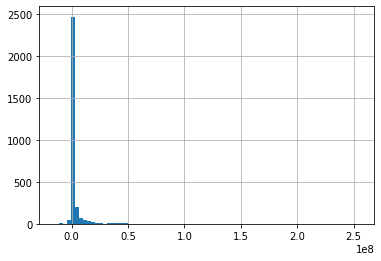

In [99]:
firms_last_quarter["bookvalue"].hist(bins=75)

array([[<AxesSubplot:title={'center':'Accommodation and Food Services'}>,
        <AxesSubplot:title={'center':'Administrative and Support and Waste Management and Remediation Services'}>,
        <AxesSubplot:title={'center':'Agriculture, Forestry, Fishing and Hunting'}>,
        <AxesSubplot:title={'center':'Arts, Entertainment, and Recreation'}>],
       [<AxesSubplot:title={'center':'Construction'}>,
        <AxesSubplot:title={'center':'Educational Services'}>,
        <AxesSubplot:title={'center':'Finance and Insurance'}>,
        <AxesSubplot:title={'center':'Health Care and Social Assistance'}>],
       [<AxesSubplot:title={'center':'Information'}>,
        <AxesSubplot:title={'center':'Manufacturing'}>,
        <AxesSubplot:title={'center':'Mining, Quarrying, and Oil and Gas Extraction'}>,
        <AxesSubplot:title={'center':'Other Services (except Public Administration)'}>],
       [<AxesSubplot:title={'center':'Professional, Scientific, and Technical Services'}>,
        <A

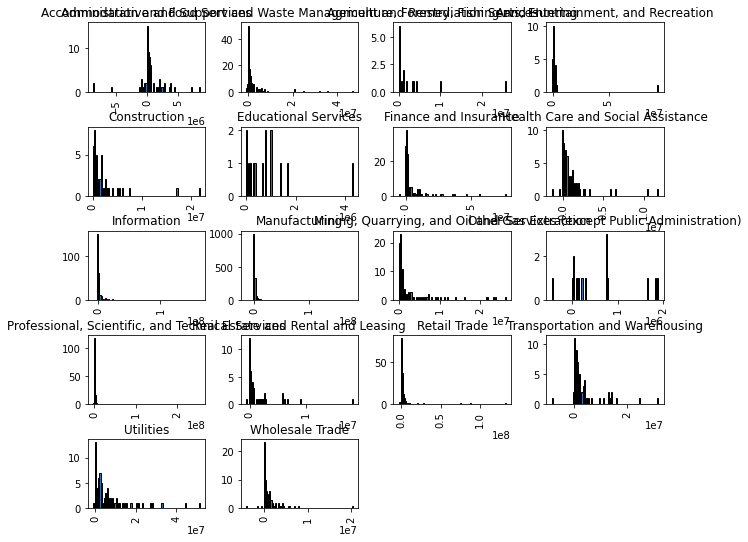

In [100]:
firms_last_quarter["bookvalue"].hist(by=firms_last_quarter["Sector NAICS\nlevel 1"], figsize=(10,9), ec="k", bins=100)

In [101]:
marketvalue_last_quarter = firms_last_quarter.groupby("Sector NAICS\nlevel 1")["marketvalue"].describe()
marketvalue_general = firms_last_quarter["marketvalue"].describe().rename("General")
marketvalue_last_quarter = pd.concat([marketvalue_general.to_frame().T, marketvalue_last_quarter])
marketvalue_last_quarter

,count,mean,std,min,25%,50%,75%,max
General,2969.0,1.572356e+07,1.822945e+08,4327.067600,2.153367e+05,1.292284e+06,5.289729e+06,8.990386e+09
Accommodation and Food Services,66.0,9.715511e+06,2.648538e+07,16089.281351,3.297987e+05,1.672090e+06,6.061025e+06,1.882293e+08
Administrative and Support and Waste Management and Remediation Services,130.0,1.623448e+07,5.045235e+07,6078.575024,5.629898e+05,2.595336e+06,7.063902e+06,3.993490e+08
"Agriculture, Forestry, Fishing and Hunting",16.0,7.692358e+06,1.356455e+07,22188.918000,2.710018e+05,1.371359e+06,5.258575e+06,4.217029e+07
"Arts, Entertainment, and Recreation",21.0,1.859315e+07,5.436971e+07,14517.646258,1.426902e+06,2.875429e+06,9.662594e+06,2.526994e+08
Construction,44.0,4.336595e+06,6.241064e+06,29897.485100,8.154477e+05,2.111921e+06,3.950881e+06,2.942511e+07
Educational Services,14.0,1.538945e+06,1.506115e+06,30500.911575,2.528720e+05,1.520949e+06,1.869224e+06,5.289729e+06
Finance and Insurance,140.0,1.548588e+07,4.576545e+07,17420.874612,8.382090e+05,2.991251e+06,1.197050e+07,4.818731e+08
Health Care and Social Assistance,64.0,4.358145e+06,8.689281e+06,10431.226500,3.040251e+05,1.442443e+06,5.172091e+06,6.270616e+07
Information,260.0,2.256667e+07,1.432397e+08,10941.657291,1.020318e+06,3.108808e+06,9.707274e+06,2.252035e+09


<AxesSubplot:>

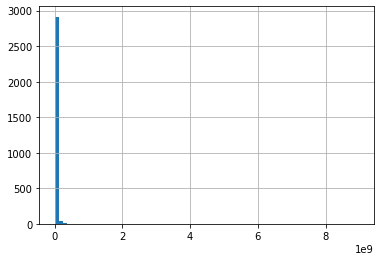

In [102]:
firms_last_quarter["marketvalue"].hist(bins=75)

array([[<AxesSubplot:title={'center':'Accommodation and Food Services'}>,
        <AxesSubplot:title={'center':'Administrative and Support and Waste Management and Remediation Services'}>,
        <AxesSubplot:title={'center':'Agriculture, Forestry, Fishing and Hunting'}>,
        <AxesSubplot:title={'center':'Arts, Entertainment, and Recreation'}>],
       [<AxesSubplot:title={'center':'Construction'}>,
        <AxesSubplot:title={'center':'Educational Services'}>,
        <AxesSubplot:title={'center':'Finance and Insurance'}>,
        <AxesSubplot:title={'center':'Health Care and Social Assistance'}>],
       [<AxesSubplot:title={'center':'Information'}>,
        <AxesSubplot:title={'center':'Manufacturing'}>,
        <AxesSubplot:title={'center':'Mining, Quarrying, and Oil and Gas Extraction'}>,
        <AxesSubplot:title={'center':'Other Services (except Public Administration)'}>],
       [<AxesSubplot:title={'center':'Professional, Scientific, and Technical Services'}>,
        <A

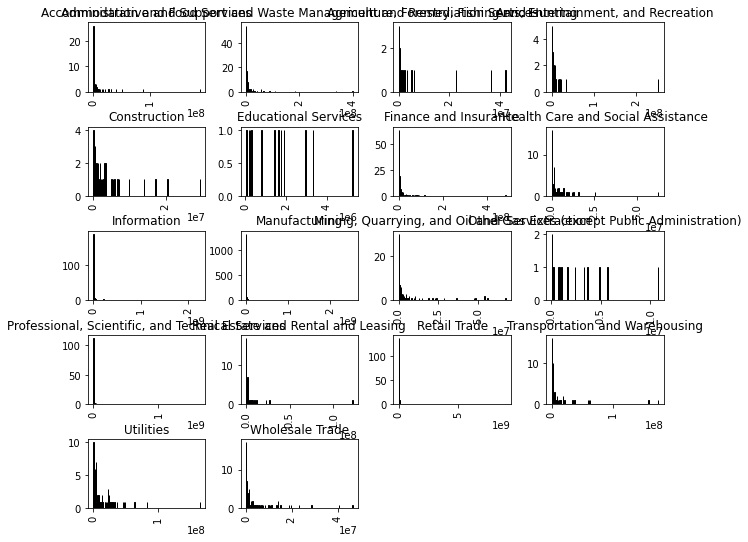

In [103]:
firms_last_quarter["marketvalue"].hist(by=firms_last_quarter["Sector NAICS\nlevel 1"], figsize=(10,9), ec="k", bins=250)

SE PUEDE VER EN LAS INDUSTRIAS CON UN BUEN NÚMERO DE EMPRESAS QUE EN LAS DOS MÉTRICAS SE TIENE UNA DISTRIBUCIÓN NORMAL SESGADA A LA DERECHA. POR ESTA MISMA RAZÓN, SE TIENE UNA IDEA MÁS CLARA DE LA EMPRESA TÍPICA SI NOS BASAMOS EN LA MEDIANA EN VEZ DE LA MEDIA. LA INDUSTRIA CON MÁS EMPRESAS ES MANUFACTURING, LA CUAL CUBRE MÁS DE 50% DE LAS EMPRESAS; LA QUE TIENE MENOS ES OTHER SERVICES. LA INDUSTRIA CON MAYOR MEDIANA EN MARKET VALUE ES UTILITIES CON 6 MIL MILLONES, EN BOOK VALUE ES IGUALMENTE UTILITIES CON 2.8 MIL MILLONES; EN ESTE PUNTO SE PUEDE VER COMO ESTAS DOS MÉTRICAS ESTÁN CORRELACIONADAS. EN BOOK VALUE SE PUEDE VER QUE LA EMPRESA TÍPICA DE CUALQUIER INDUSTRIA ESTÁ ENTRE CIEN MIL Y MIL MILLONES (CURIOSAMENTE ARTES ES UN VALOR ATÍPICO CON APROXIMADAMENTE 70 MILLONES, PROBABLEMENTE POR NO CONTAR CON BASTANTES ACTIVOS) Y EN MARKET VALUE ENTRE 500 MILLONES Y 6 MIL MILLONES.

### For each industry (and for all industries), what can you say about profit margin of firms? show a) descriptive statistics of profit margin and b) plot(s) to illustrate how profit margin changes across industries. 

In [104]:
firms_last_quarter.groupby("Sector NAICS\nlevel 1")["operatingmargin"].describe()

operatingmargin_last_quarter = firms_last_quarter.groupby("Sector NAICS\nlevel 1")["operatingmargin"].describe()
operatingmargin_general = firms_last_quarter["operatingmargin"].describe().rename("General")
operatingmargin_last_quarter = pd.concat([operatingmargin_general.to_frame().T, operatingmargin_last_quarter])
operatingmargin_last_quarter

,count,mean,std,min,25%,50%,75%,max
General,2795.0,1.155426,1783.193164,-43850.000000,-0.244099,0.042808,0.142111,83242.000000
Accommodation and Food Services,66.0,0.079903,0.167041,-0.589221,0.022516,0.076932,0.158747,0.423647
Administrative and Support and Waste Management and Remediation Services,130.0,-0.834649,7.683241,-84.128947,-0.034491,0.058694,0.143711,0.618778
"Agriculture, Forestry, Fishing and Hunting",16.0,-0.080686,0.328882,-1.192328,-0.091354,0.009550,0.090129,0.167108
"Arts, Entertainment, and Recreation",21.0,-0.100582,0.596936,-2.043234,-0.036147,0.112280,0.223518,0.415476
Construction,44.0,0.111892,0.114226,-0.144403,0.035255,0.093662,0.163385,0.539738
Educational Services,14.0,-0.008109,0.307771,-0.944201,-0.039941,0.037402,0.111229,0.328612
Finance and Insurance,137.0,0.149188,0.494235,-3.309726,0.023555,0.197996,0.354257,0.948587
Health Care and Social Assistance,63.0,-6.314959,35.080360,-257.697183,-0.386842,0.001727,0.097215,3.627698
Information,259.0,-0.984501,9.848693,-153.453537,-0.294916,-0.043172,0.092205,1.000000


array([[<AxesSubplot:title={'center':'Accommodation and Food Services'}>,
        <AxesSubplot:title={'center':'Administrative and Support and Waste Management and Remediation Services'}>,
        <AxesSubplot:title={'center':'Agriculture, Forestry, Fishing and Hunting'}>,
        <AxesSubplot:title={'center':'Arts, Entertainment, and Recreation'}>],
       [<AxesSubplot:title={'center':'Construction'}>,
        <AxesSubplot:title={'center':'Educational Services'}>,
        <AxesSubplot:title={'center':'Finance and Insurance'}>,
        <AxesSubplot:title={'center':'Health Care and Social Assistance'}>],
       [<AxesSubplot:title={'center':'Information'}>,
        <AxesSubplot:title={'center':'Manufacturing'}>,
        <AxesSubplot:title={'center':'Mining, Quarrying, and Oil and Gas Extraction'}>,
        <AxesSubplot:title={'center':'Other Services (except Public Administration)'}>],
       [<AxesSubplot:title={'center':'Professional, Scientific, and Technical Services'}>,
        <A

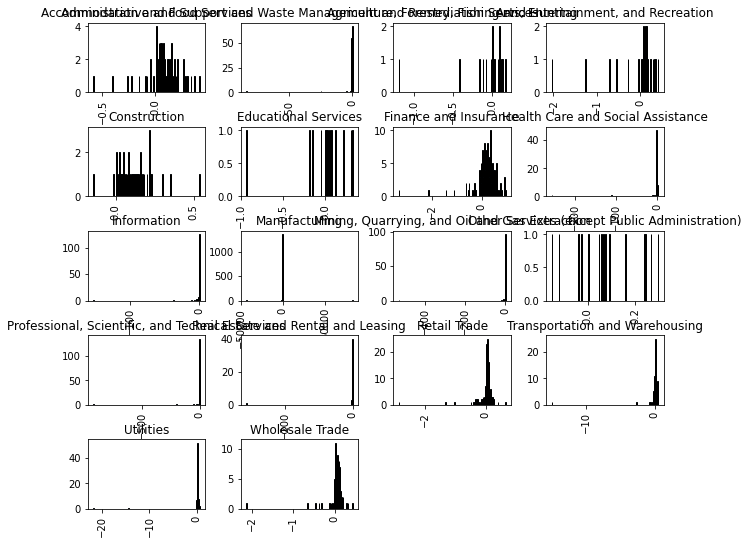

In [105]:
firms_last_quarter["operatingmargin"].hist(by=firms_last_quarter["Sector NAICS\nlevel 1"], figsize=(10,9), ec="k", bins=150)

SE PUEDE VER QUE LA DISTRIBUCIÓN POR INDUSTRIA SE VE MÁS NORMAL QUE EN LAS MÉTRICAS ANTERIORES (AUNQUE SE PUEDE NOTAR UN POCO DE SESGO, ESTA VEZ A LA IZQUIERDA). EN LA MAYORÍA DE LAS EMPRESAS HAY UNA MEDIANA LIGERAMENTE ENCIMA DEL 0. POR LA FORMA EN QUE FUNCIONA LA FÓRMULA, LOS VALORES EXTREMOS POR EL LADO DERECHO SE ACABAN ANTES DEL 1 POR LO QUE NO CAMBIAN MUCHO EL PROMEDIO PERO DEL LADO IZQUIERDO SE PUEDEN VER ALGUNOS VALORES MUY EXTREMOS COMO EN EL CASO DE INFORMATION O MANUFACTURING. SI NOS BASAMOS EN LA MEDIANA, PODEMOS DECIR QUE LA ÚNICA INDUSTRIA EN QUE LA EMPRESA TIPICA TIENE UN MAL OPERATING MARGIN ES INFORMATION (ESTO ES PORQUE TIENEN UN OPERATING MARGIN NEGATIVO). TAMBIÉN SE PUEDE DECIR QUE LA MAYORÍA DE LAS EMPRESAS EN FINANCE TIENEN MUY BUEN OPERATING MARGIN PORQUE ES DE LAS POCAS INDUSTRIAS QUE TIENE UN VALOR POSITIVO EN 25% Y TIENE DE LOS MEJORES MARGENES EN 50% Y 75%.

### Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

In [106]:
sorted_market_value = firms_last_quarter.sort_values(by=["marketvalue"], ascending=False)
top_ten_market_value = sorted_market_value.head(10)["marketvalue"]
top_ten_market_value

firm
AMZN     8.990386e+09
AAPL     2.529916e+09
MSFT     2.252035e+09
GOOGL    1.636346e+09
TSLA     6.976698e+08
META     5.205842e+08
UNH      4.818731e+08
JNJ      4.665425e+08
V        3.993490e+08
NVDA     3.789750e+08
Name: marketvalue, dtype: float64

<AxesSubplot:>

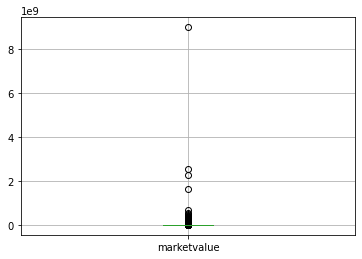

In [107]:
firms_last_quarter.boxplot(column=["marketvalue"])

In [108]:
firms_last_quarter["marketvalue"].describe()

count    2.969000e+03
mean     1.572356e+07
std      1.822945e+08
min      4.327068e+03
25%      2.153367e+05
50%      1.292284e+06
75%      5.289729e+06
max      8.990386e+09
Name: marketvalue, dtype: float64

In [109]:
(top_ten_market_value - firms_last_quarter["marketvalue"].median()) / firms_last_quarter["marketvalue"].std()

firm
AMZN     49.310844
AAPL     13.871095
MSFT     12.346745
GOOGL     8.969298
TSLA      3.820070
META      2.848644
UNH       2.636289
JNJ       2.552191
V         2.183592
NVDA      2.071828
Name: marketvalue, dtype: float64

LA MEJOR EMPRESA EN CUANTO A MARKET VALUE ES AMAZON (CUANDO LO ESTABA HACIENDO POR TRIMESTRES ERA APPLE POR 20 SD). EL VALOR DEL TOP 3 ESTÁ ARRIBA DE 10 DESVIACIONES ESTÁNDAR, CONSIDERANDO QUE EN LA DISTRIBUCIÓN NORMAL 3 DESVIACIONES ESTÁNDAR DE ARRIBA Y ABAJO SON EL 99.73%, ESTAS EMPRESAS SON TOTALMENTE FUERA DE SERIE EN LA INDUSTRIA

### Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?

In [110]:
sorted_book_value = firms_last_quarter.sort_values(by=["bookvalue"], ascending=False)
top_ten_book_value = sorted_book_value.head(10)["bookvalue"]
top_ten_book_value

firm
GOOGL    2.547115e+08
XOM      1.789057e+08
MSFT     1.631587e+08
CVX      1.545620e+08
T        1.353070e+08
AMZN     1.327015e+08
META     1.244975e+08
INTC     1.021770e+08
CMCSA    9.583650e+07
DIS      9.460325e+07
Name: bookvalue, dtype: float64

<AxesSubplot:>

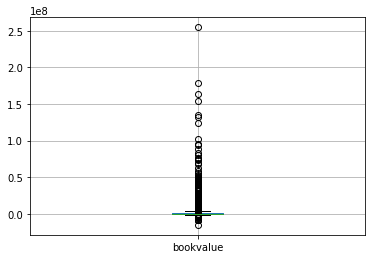

In [111]:
firms_last_quarter.boxplot(column=["bookvalue"])

In [112]:

firms_last_quarter["bookvalue"].describe()

count    2.969000e+03
mean     2.783491e+06
std      1.111874e+07
min     -1.496833e+07
25%      7.350600e+04
50%      3.748940e+05
75%      1.472407e+06
max      2.547115e+08
Name: bookvalue, dtype: float64

In [113]:
(top_ten_book_value - firms_last_quarter["bookvalue"].median()) / firms_last_quarter["bookvalue"].std()

firm
GOOGL    22.874592
XOM      16.056747
MSFT     14.640489
CVX      13.867320
T        12.135559
AMZN     11.901225
META     11.163371
INTC      9.155904
CMCSA     8.585651
DIS       8.474735
Name: bookvalue, dtype: float64

LA MEJOR EMPRESA EN CUANTO A BOOKVALUE ES GOOGLE. SE PUEDE NOTAR QUE BOOKVALUE TIENE LOS VALORES MÁXIMOS A MENOS DESVIACIONES ESTÁNDAR, TAMBIÉN SE PUEDE NOTAR QUE LOS VALORES ESTÁN MÁS JUNTOS POR LO QUE TAL VEZ ESTÁ MENOS SESGADA A LA DERECHA. LA EXPLICACIÓN PROBABLE DE ESTO ES QUE LOS VALORES DE LIBRO SON MÁS ESTÁTICOS COMPARADOS CON LAS ACCIONES QUE PUEDEN SER MÁS VOLÁTILES

## 2.2.1.2 Considering the whole history of financial data for all firms:
### How can you measure firm profitability that can be used to compare performance among firms of different sizes? Select and justify at least 3 measures and show descriptive statistics

In [114]:
df["salesannualgrowth"] = (df["revenue"] / df["lrevenue"]) -1
df["salesannualgrowth"].replace([-np.inf, np.inf], np.nan, inplace=True)
df.groupby(["firm"])["salesannualgrowth"].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,21.0,-0.012042,0.157990,-0.360134,-0.141847,0.048532,0.064954,0.283615
AA,6.0,0.656097,1.452685,-0.221592,-0.044886,0.183326,0.285572,3.592826
AAL,9.0,0.364175,0.787611,-0.706378,-0.022918,0.040456,0.794865,1.710077
AAOI,8.0,0.194188,0.433883,-0.345751,-0.098146,0.056812,0.485984,0.880620
AAON,10.0,0.090937,0.080779,0.011362,0.062462,0.072297,0.094058,0.303837
...,...,...,...,...,...,...,...,...
ZVIA,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZVO,11.0,-0.027846,0.380452,-0.337650,-0.186941,-0.092381,-0.062897,1.086414
ZWS,10.0,-0.003359,0.516267,-1.136863,-0.033174,-0.000452,0.063265,1.042348


In [148]:
df["operatingprofitgrowth"] = df["ebit"] / df["lebit"]
df["operatingprofitgrowth"].replace([-np.inf, np.inf], np.nan, inplace=True)
df.groupby(["firm"])["operatingprofitgrowth"].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,21.0,0.907197,0.839415,-1.295435,0.815920,1.030702,1.236066,2.214286
AA,6.0,-1.533948,6.069835,-13.388889,-1.603991,0.696368,1.869917,2.902141
AAL,9.0,-5.971504,22.252653,-65.156028,0.159682,0.719595,1.335375,5.314254
AAOI,8.0,2.137466,3.125394,-1.204994,0.809151,1.136136,2.071726,8.736978
AAON,10.0,1.104770,0.239156,0.722797,0.988237,1.126291,1.205952,1.556059
...,...,...,...,...,...,...,...,...
ZVIA,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZVO,11.0,6.830891,21.864512,-2.955419,0.054911,0.583900,1.022331,72.653402
ZWS,10.0,1.050795,0.675723,-0.291559,0.851696,0.998638,1.287221,2.238095


In [116]:
df["booktomarketratio"] = df["marketvalue"] / df["bookvalue"]
df.groupby(["firm"])["booktomarketratio"].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,22.0,4.061011,1.612225,1.658866,3.073928,3.782920,4.506232,8.631237
AA,7.0,1.019926,0.500066,0.457384,0.662913,0.988013,1.258682,1.850896
AAL,10.0,-3.330798,12.665535,-29.345547,-10.091606,-1.209166,5.736212,9.528991
AAOI,9.0,1.651225,0.965174,0.490909,0.826755,1.548971,2.495194,2.957589
AAON,11.0,7.108146,1.799101,3.661612,6.510392,7.309702,8.507579,9.344091
...,...,...,...,...,...,...,...,...
ZVIA,2.0,4.151431,2.011918,2.728790,3.440110,4.151431,4.862751,5.574071
ZVO,12.0,1.866961,0.799936,0.876286,1.311315,1.612192,2.235981,3.413262
ZWS,11.0,5.258385,5.793469,2.163343,2.486310,3.916098,4.613412,22.415393


Escogí sales annual growth, operating profit growth y book to market ratio. Escogí las primeras dos porque nos indican qué tanto crece la empresa. Book to market ratio se podría interpretar como que están sacando más ganancia de menos recursos

### Calculate and explain earnings per share deflated by price.

In [117]:
df["epsp"] = (df["ebit"] / df["sharesoutstanding"]) / df["originalprice"]
df.groupby(["firm"])["epsp"].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,22.0,0.023508,0.059850,-0.179348,0.029790,0.040673,0.047880,0.084435
AA,7.0,0.101853,0.097536,-0.035874,0.048386,0.120106,0.145528,0.240913
AAL,10.0,-0.005757,0.393202,-1.085190,0.030678,0.133539,0.159234,0.240193
AAOI,9.0,-0.093797,0.189150,-0.468500,-0.209705,0.005904,0.036282,0.110258
AAON,11.0,0.046139,0.019101,0.020566,0.031123,0.042258,0.058873,0.079740
...,...,...,...,...,...,...,...,...
ZVIA,2.0,-0.137958,0.010205,-0.145174,-0.141566,-0.137958,-0.134349,-0.130741
ZVO,12.0,-0.138432,0.274315,-0.581138,-0.322842,-0.052592,0.040476,0.220834
ZWS,11.0,0.077143,0.039818,-0.016489,0.062813,0.077767,0.095615,0.137674


# 2.2.2 About statistical modeling

### You have to select a group of firms according to their general industry classification:
### Manufacturing

### Using your subset of firms that belong to your industry, which factors (variables) might be related to annual stock return one quarter in the future? Select at least 3 factors and briefly explain why you think might be related to stock returns.

DV: Continously compounded stock return
IV: Operating profit growth, book to market value, short debts

-Operating profit growth: Uno de los problemas de las variables originales es que solo muestran el estado actual mientras que percibo que el cc stock return depende de qué tanto está creciendo la empresa, este factor me parece el que mejor representa si la empresa está creciendo

-Book to market ratio: Investigando sobre esta variable descubrí que se puede entender que un ratio menor a 1 nos dice que el stock está infravalorado y mayor a 1 que está sobrevalorado, se podría esperar que si uno de estos casos es verdad el mercado se va a dar cuenta y va a estabilizar el stock. ¿Por qué manejo una interpretación distinta en esta sección comparada con la anterior? Algunas industrias que no tienen tantos assets (como finanzas o artes que vimos en un ejemplo anterior) no es muy buena métrica porque no se utilizan bastante assets como fábricas o maquinarias, en cambio en manufactura es una parte esencial del negocio

-Short debt: Esta es de la que estoy menos seguro pero tengo la hipótesis que se necesita contraer deuda para poder hacer crecer la empresa, más en una industria que depende de los assets como manufactura

In [149]:
df_manufacturing = df[df["Sector NAICS\nlevel 1"] == "Manufacturing"]
df_manufacturing

revenue       cogs          sgae  otheropexp    extraincome  \
firm qdate                                                                   
A    2000   11368000.0  5811000.0  4.396000e+06         0.0   74000.000000   
     2001    7274000.0  4767000.0  4.011000e+06         0.0  912000.000000   
     2002    5996000.0  3699000.0  3.718000e+06         0.0 -224000.000000   
     2003    6287000.0  3783000.0  2.894000e+06         0.0   24000.000000   
     2004    7196000.0  4061000.0  2.733000e+06         0.0   79000.000000   
...                ...        ...           ...         ...            ...   
ZYNE 2017          0.0        0.0  4.112005e+04         0.0    -302.944245   
     2018         86.0        0.0  3.709532e+04         0.0    -260.481381   
     2019          0.0        0.0  4.598362e+04         0.0    -308.622320   
     2020          0.0        0.0  3.714461e+04         0.0     539.375698   
     2021          0.0        0.0  3.711977e+04         0.0    -818.374594   

              finexp  incometax   totalassets  totalliabilities     shortdebt  \
firm qdate                                                                      
A    2000      0.000   455000.0  8.195250e+06      3.107750e+06  606500.00000   
     2001      0.000  -297000.0  8.561500e+06      3.022250e+06  582000.00000   
     2002      0.000  -559000.0  8.162000e+06      3.385750e+06  259250.00000   
     2003      0.000  1252000.0  6.572000e+06      3.368500e+06  353000.00000   
     2004      0.000   100000.0  6.905500e+06      3.442250e+06  263250.00000   
...              ...        ...           ...               ...           ...   
ZYNE 2017   -679.622        0.0  6.355736e+04      9.557521e+03       0.00000   
     2018  -1389.987        0.0  7.783700e+04      9.084728e+03     116.44125   
     2019   -960.271        0.0  8.650756e+04      1.120762e+04     223.18600   
     2020    -27.283        0.0  8.956660e+04      1.201727e+04     174.82450   
     2021   -197.206        0.0  7.813892e+04      1.013662e+04     209.79500   

            ...          ebit         lebit  ccstockreturns     bookvalue  \
firm qdate  ...                                                             
A    2000   ...  1.161000e+06  0.000000e+00             NaN  5.087500e+06   
     2001   ... -1.504000e+06  1.161000e+06       -0.588899  5.539250e+06   
     2002   ... -1.421000e+06 -1.504000e+06       -0.532587  4.776250e+06   
     2003   ... -3.900000e+05 -1.421000e+06        0.413298  3.203500e+06   
     2004   ...  4.020000e+05 -3.900000e+05       -0.053899  3.463250e+06   
...         ...           ...           ...             ...           ...   
ZYNE 2017   ... -4.112005e+04 -2.875113e+04       -0.513772  5.399984e+04   
     2018   ... -3.700932e+04 -4.112005e+04       -0.266954  6.875227e+04   
     2019   ... -4.598362e+04 -3.700932e+04       -0.369572  7.529994e+04   
     2020   ... -3.714461e+04 -4.598362e+04       -0.228567  7.754933e+04   
     2021   ... -3.711977e+04 -3.714461e+04       -0.473272  6.800229e+04   

             marketvalue operatingmargin salesannualgrowth  \
firm qdate                                                   
A    2000   2.365853e+07        0.102129               NaN   
     2001   1.332281e+07       -0.206764         -0.360134   
     2002   7.923159e+06       -0.236991         -0.175694   
     2003   1.219925e+07       -0.062033          0.048532   
     2004   1.181017e+07        0.055864          0.144584   
...                  ...             ...               ...   
ZYNE 2017   1.325088e+05             NaN               NaN   
     2018   1.456007e+05     -430.340887               NaN   
     2019   1.233737e+05             NaN         -1.000000   
     2020   1.460511e+05             NaN               NaN   
     2021   1.085850e+05             NaN               NaN   

            operatingprofitgrowth  booktomarketratio      epsp  
firm qdate                                                      
A    20

## Do histograms for each factor/variables and interpret them

<AxesSubplot:>

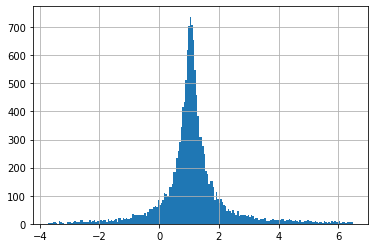

In [170]:
df_manufacturing[(df_manufacturing["operatingprofitgrowth"] < df_manufacturing["operatingprofitgrowth"].quantile(.975)) & (df_manufacturing["operatingprofitgrowth"] > df_manufacturing["operatingprofitgrowth"].quantile(.025))]["operatingprofitgrowth"].hist(bins=200)
#Se usa entre el 2.5 percentil al 97.5 porque hay valores muy extremos que hacen difícil ver la gráfica

<AxesSubplot:>

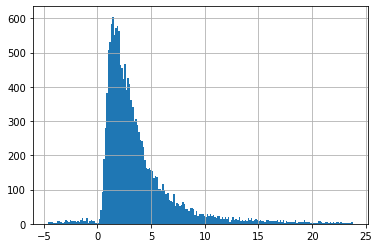

In [173]:
df_manufacturing[(df_manufacturing["booktomarketratio"] < df_manufacturing["booktomarketratio"].quantile(.975)) & (df_manufacturing["booktomarketratio"] > df_manufacturing["booktomarketratio"].quantile(.025))]["booktomarketratio"].hist(bins=200)

<AxesSubplot:>

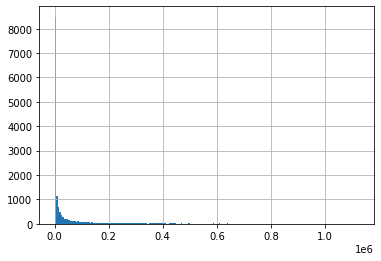

In [178]:
df_manufacturing[(df_manufacturing["shortdebt"] < df_manufacturing["shortdebt"].quantile(.95))]["shortdebt"].hist(bins=200)

In [ ]:
plt.clf()
tmp_df_manufacturing = df_manufacturing[(df_manufacturing["operatingprofitgrowth"] < df_manufacturing["operatingprofitgrowth"].quantile(.975)) & (df_manufacturing["operatingprofitgrowth"] > df_manufacturing["operatingprofitgrowth"].quantile(.025))]
x = tmp_df_manufacturing["operatingprofitgrowth"]
y = tmp_df_manufacturing["ccstockreturns"]

b1,b0 = np.polyfit(x,y,1)
yfit = b0+b1*x

print(b0, b1)
plt.plot(x, yfit,c="orange")

plt.scatter(x,y)

nan nan


,booktomarketratio,ccstockreturns
count,15478.000000,15477.000000
mean,3.733085,-0.033864
std,3.487367,0.807755
min,-4.578858,-6.299183
25%,1.627670,-0.248428
50%,2.724359,0.047016
75%,4.571205,0.263242
max,23.775464,11.481151


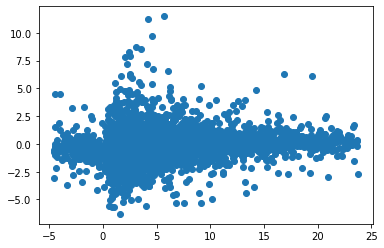

In [205]:
plt.clf()
tmp_df_manufacturing = df_manufacturing[(df_manufacturing["booktomarketratio"] < df_manufacturing["booktomarketratio"].quantile(.975)) & (df_manufacturing["booktomarketratio"] > df_manufacturing["booktomarketratio"].quantile(.025))]
x = tmp_df_manufacturing["booktomarketratio"]
y = tmp_df_manufacturing["ccstockreturns"]

b1,b0 = np.polyfit(x,y,1)
yfit = b0+b1*x

print(b0, b1)
plt.plot(x, yfit,c="orange")

plt.scatter(x,y)
tmp_df_manufacturing[["booktomarketratio", "ccstockreturns"]].describe()

In [179]:
df_manufacturing[["operatingprofitgrowth", "booktomarketratio", "shortdebt"]].describe()

,operatingprofitgrowth,booktomarketratio,shortdebt
count,14706.000000,16294.000000,1.629400e+04
mean,2.132231,6.508362,4.423628e+05
std,84.458867,287.117898,4.760025e+06
min,-1157.375000,-23699.564982,0.000000e+00
25%,0.697704,1.572237,8.930731e+01
50%,1.061242,2.724359,4.634000e+03
75%,1.451829,4.746154,6.004919e+04
max,9361.196460,26074.101623,1.953745e+08
